# Laboratorio 02 - Modelación y Simulación

## Ejercicio 1
1. ¿Qué es el método de Euler y cómo aproxima las soluciones a las EDO?
  
Es un procedimiento numérico sencillo para aproximar soluciones a ecuaciones diferenciales (EDO) de primer orden. Dado un problema de la forma dy/dx = f(x,y) con una condición inicial y(x0) = y0, este método aproxima la solución construyendo una secuencia de valores, utilizando la fórmula de recurrencia: 

yn+1=yn + h*f(xn,yn)

donde h es el tamaño del paso. Comenzando en el punto inicial 

1. ¿Cuáles son las ventajas y desventajas del método de Euler en comparación con otros métodos numéricos para EDO? (Mencione al menos 1 ventaja y 1 desventaja)
2. ¿Cómo afecta la elección del tamaño de paso (h) a la precisión del método de Euler?

## Ejercicio 2

### 2.1 Crecimiento poblacional

Considere el siguiente modelo de crecimiento poblacional

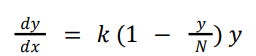

Después de 4 días, una población inicial de mariposas de 15 crece a 56. Si el ecosistema restringido alberga 300 mariposas, **¿cuántas mariposas habrá en 12 días?** Suponiendo que la población de mariposas crece más rápido cuando hay 150 mariposas, **¿cuándo sucede esto?**

**Nota:** Pueden usar la función `fsolve` de `scipy.optimize`

In [6]:
import numpy as np

# función de crecimiento
def crecimiento(k, n, y):
    return k * (1 - (y / n)) * y

# Método de Euler para aproximar la solución de la ecuación diferencial
def euler_method(k, n, y0, t0, tf, dt):
    t = np.arange(t0, tf, dt)
    y = np.zeros(t.shape)
    y[0] = y0
    for i in range(1, len(t)):
        y[i] = y[i-1] + crecimiento(k, n, y[i-1]) * dt
    return y[-1]

# Datos proporcionados
y0 = 15  # Población inicial
y4 = 56  # Población después de 4 días
n = 300  # Capacidad de carga
dt = 1   # Intervalo de tiempo en días

# Estimación de k
# Asumimos que k es constante y usamos los valores de población en t=0 y t=4 para estimar k
# Esta es una simplificación y puede no ser precisa
k_estimado = (np.log(y4/y0) / 4) / (1 - ((y0 + y4) / (2 * n)))

# Predicción del tamaño de la población en 12 días
tamaño_12_días = euler_method(k_estimado, n, y0, 0, 12, dt)

print(f"El tamaño estimado de la población en 12 días es: {tamaño_12_días:.2f}")

El tamaño estimado de la población en 12 días es: 212.54


In [7]:
import numpy as np

# Parámetros del modelo
r = 0.1  # Tasa intrínseca de crecimiento (ejemplo)
N = 300  # Capacidad de carga
P0 = 10  # Población inicial
target_P = 150  # Población objetivo

# Método de Euler para simular la ecuación logística
def euler_logistic(r, N, P0, target_P, dt=0.1):
    P = P0
    t = 0
    while P < target_P:
        dP = r * P * (1 - P / N) * dt
        P += dP
        t += dt
    return t

# Calcular el tiempo cuando la población alcanza 150
tiempo = euler_logistic(r, N, P0, target_P)

print(f"La población de mariposas alcanza 150 más rápido en t = {tiempo:.2f} días. ")

La población de mariposas alcanza 150 más rápido en t = 33.80 días. 
